In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
columns_with_zeros = []
for col in df.columns[:-1]:
    if (df[col] == 0).sum() > 0:
        print(f"{col}: {(df[col] == 0).sum()}")
        columns_with_zeros.append(col)
    else:
        print(f"{col}: No zero value")

print(columns_with_zeros)

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: No zero value
Age: No zero value
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [66]:
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [68]:
df[columns_with_zeros]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6.0,148.0,72.0,35.0,NaN,33.6
1,1.0,85.0,66.0,29.0,NaN,26.6
2,8.0,183.0,64.0,NaN,NaN,23.3
3,1.0,89.0,66.0,23.0,94.0,28.1
4,NaN,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9
764,2.0,122.0,70.0,27.0,NaN,36.8
765,5.0,121.0,72.0,23.0,112.0,26.2
766,1.0,126.0,60.0,NaN,NaN,30.1


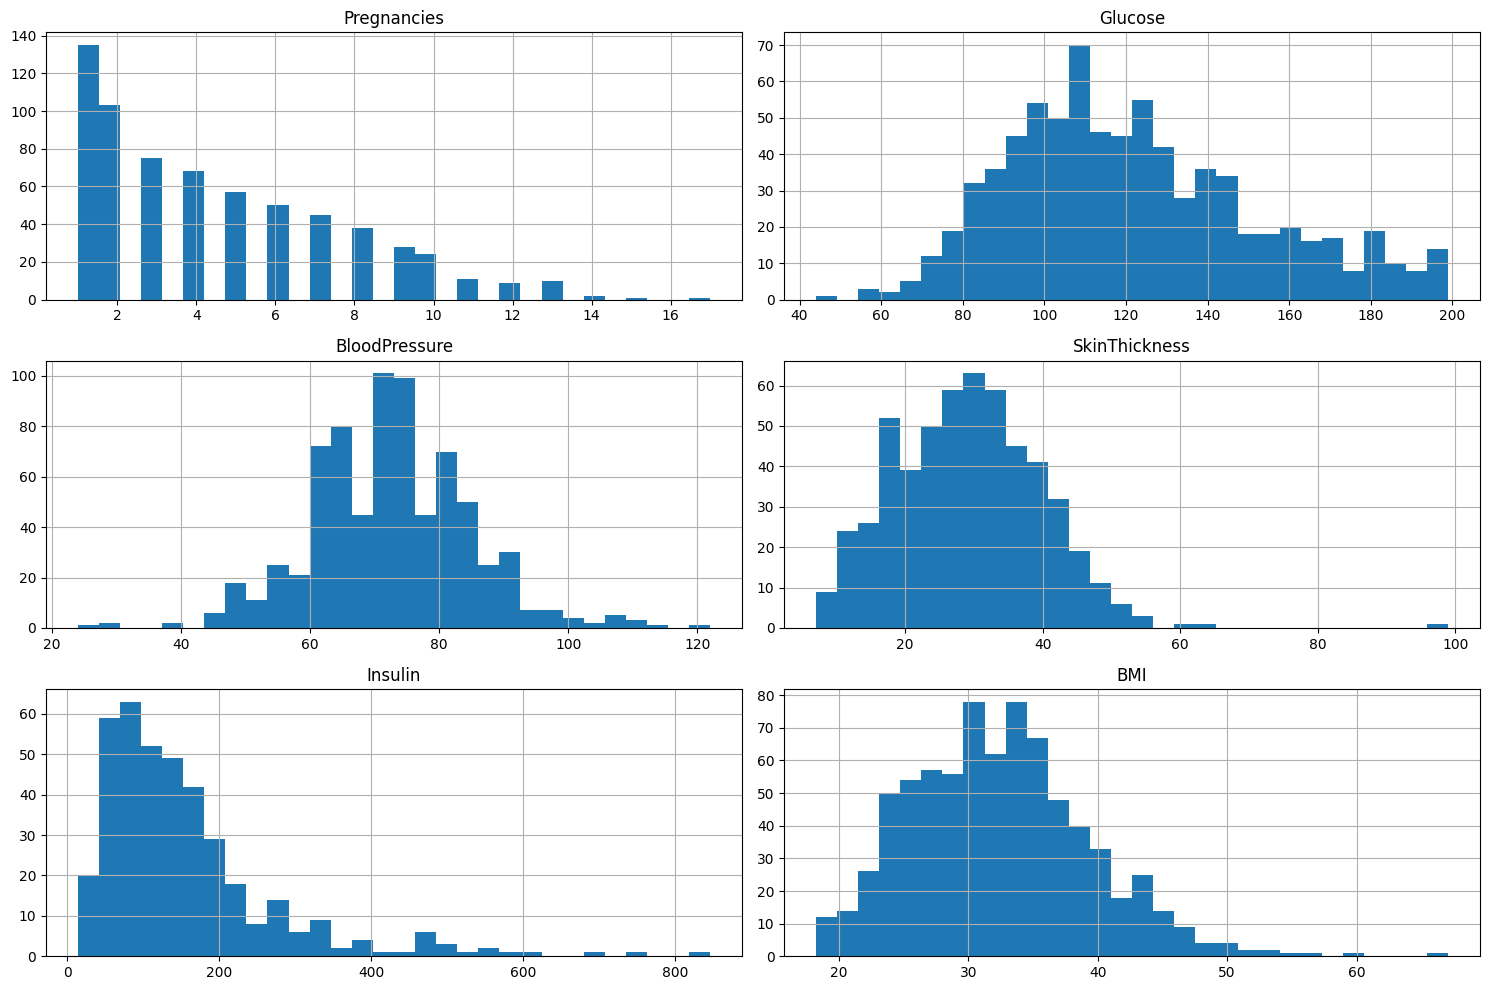

In [69]:
df[columns_with_zeros].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [96]:
df[(df['Insulin']<50)].sort_values('Insulin',ascending=False).reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,672,10.0,68.0,106.0,23.0,49.0,35.5,0.285,47,0
1,462,8.0,74.0,70.0,40.0,49.0,35.3,0.705,39,0
2,482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28,0
3,288,4.0,96.0,56.0,17.0,49.0,20.8,0.340,26,0
4,134,2.0,96.0,68.0,13.0,49.0,21.1,0.647,26,0
5,92,7.0,81.0,78.0,40.0,48.0,46.7,0.261,42,0
6,197,3.0,107.0,62.0,13.0,48.0,22.9,0.678,23,1
7,173,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23,0
8,639,1.0,100.0,74.0,12.0,46.0,19.5,0.149,28,0
9,273,1.0,71.0,78.0,50.0,45.0,33.2,0.422,21,0
